In [121]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [122]:
dirname_org = "../org+adv_unlim/org"
# dirname_adv_0 = "../org+adv/adv/0/0→0"
# dirname_adv_1 = "../org+adv/adv/0/0→1"
# dirname_adv_2 = "../org+adv/adv/0/0→2"
# dirname_adv_3 = "../org+adv/adv/0/0→3"
# dirname_adv_4 = "../org+adv/adv/0/0→4"
# dirname_adv_5 = "../org+adv/adv/0/0→5"
# dirname_adv_6 = "../org+adv/adv/0/0→6"
# dirname_adv_7 = "../org+adv/adv/0/0→7"
# dirname_adv_8 = "../org+adv/adv/0/0→8"
# dirname_adv_9 = "../org+adv/adv/0/0→9"

In [123]:
dirname_adv = "../org+adv_unlim/adv"

def f(org, adv):
    return sum(os.path.isfile(os.path.join(dirname_adv + str(org) + "/" + str(org) + "→" + str(adv), name)) for name in os.listdir(dirname_adv + str(org) + "/" + str(org) + "→" + str(adv)))

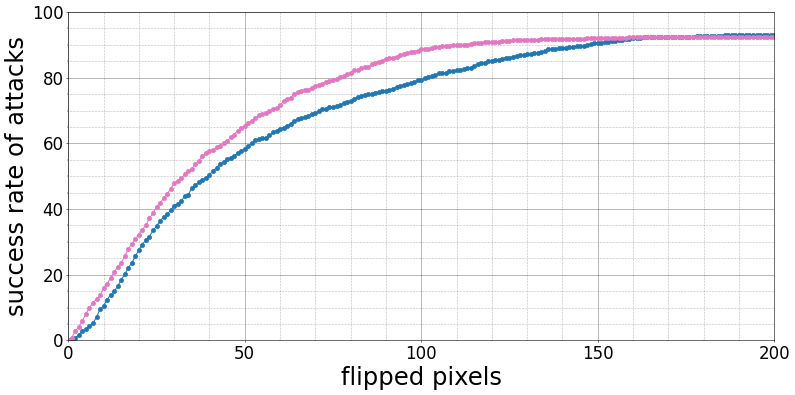

In [124]:
all_count_list = []
max = 0
for o in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    count_list = [0] * 201
    for i in range(1, sum(os.path.isfile(os.path.join(dirname_org + "/" + str(o), name)) for name in os.listdir(dirname_org + "/" + str(o))) + 1):
        img1 = np.array(Image.open(dirname_org + "/{}/{}.png".format(o, i)).convert("L"))
        for a in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
            if os.path.isfile(dirname_adv + "/{}/{}→{}/{}.png".format(o, o, a, i)) == False:
                continue
            img2 = np.array(Image.open(dirname_adv + "/{}/{}→{}/{}.png".format(o, o, a, i)).convert("L"))
            # print(np.count_nonzero(img1 - img2))
            if o != a:
                if np.count_nonzero(img1 - img2) > max:
                    max = np.count_nonzero(img1 - img2)
                for j in range(np.count_nonzero(img1 - img2), 201):
                    count_list[j] += 1
    all_count_list.append(count_list)
            # else:
            #     count_list[30] += 1


x_datas = range(0, 201)
plt.figure(figsize=(16, 8), dpi=50)
i = 0

for o in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    if o != 0 and o != 6:
        all_count_list[o] = [-10] * 201
    plt.plot(x_datas, [n / sum(os.path.isfile(os.path.join(dirname_org + "/" + str(o), name)) * 0.01 for name in os.listdir(dirname_org + "/" + str(o))) for n in all_count_list[i]], marker = 'o', label = str(o))
    i += 1
# plt.plot(x_datas, tokyo, marker = 'o', label = 'Tokyo')
# plt.plot(x_datas, okinawa, marker = 'x', label = 'Okinawa')

plt.xticks(np.arange(0, 201, 50))
plt.xlim(0, 200)
plt.ylim(0, 100) #y軸の最大値を変更30→35
plt.xlabel('flipped pixels', fontsize = 35)
plt.ylabel('success rate of attacks', fontsize = 35)
plt.tick_params(labelsize=24)
plt.minorticks_on()
plt.grid(which="major", color="black", alpha=0.5)
plt.grid(which="minor", color="gray", linestyle=":")
params = {'legend.fontsize': 24,
          'legend.handlelength': 5}
plt.rcParams.update(params)
# plt.legend(loc = 'upper right')
plt.tight_layout()
plt.savefig("../org+adv_unlim/pixel_count_ratio_0_6.png", facecolor="white")
plt.show()
# left = np.array(range(1, 31))
# height = np.array(count_list)
# labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30"]
# plt.figure(figsize=(16, 8), dpi=50)
# plt.bar(left, height, align="center", width=1.0)
# plt.xticks(left, labels, fontsize=14)
# plt.yticks(fontsize=14)
# plt.xlabel("the number of pixels", fontsize=14)
# plt.ylabel("the number of data", fontsize=14)
# plt.tight_layout()
# plt.savefig("../org+adv/pixel_count.png", facecolor="white")